In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [4]:
path = "D:/DL/k_means_data.txt"
k_means_data = pd.read_csv(path, sep="\s\s", engine='python')
k_means_data.columns = ['x', 'y']
k_means_data = k_means_data.astype('float')

# shuffling data
k_means_data = shuffle(k_means_data)
k_means_data.reset_index(inplace=True, drop=True)

k_means_data

,x,y
0,2.099092,1.272317
1,4.980007,-0.062360
2,2.850109,1.281555
3,4.757472,0.512693
4,4.659026,0.434396
5,4.637291,0.385223
6,4.674987,0.602789
7,4.840183,0.274076
8,2.045710,0.792122
9,4.964869,0.345383


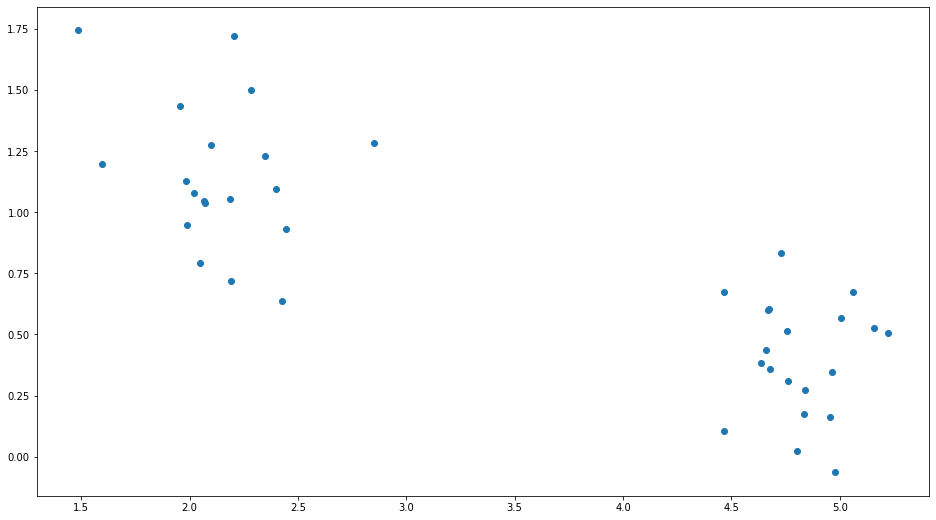

In [5]:
plt.figure(figsize=(16,9))
plt.scatter(k_means_data['x'],k_means_data['y'])

In [29]:
class KMeansCustom:
    def __init__(self, cluster_num=3, tol=0.0001):
        self.cluster_num = cluster_num
        self.tol = tol
        
    def euclead_dist(self, point1, point2):
        dist = math.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))
        return dist
        
        
    def bubble_min(self, lis):
        min_ = 0
        for i in range(len(lis) - 1):
            for j in range(i + 1, len(lis)):
                if lis[i] < lis[j]:
                    min_ = lis[i]
                else:
                    min_ = lis[j]
        return min_


    def fit(self,data):

        self.centroids = {}

        for i in range(self.cluster_num):            
            self.centroids[i] = data[i]     # assigning random centroids (1st two but random 'cause data was shuffled)

        while True:                         # main loop
            self.classifications = {}       # classifications {centroid1: [[],[],[]], centroid2: [[],[],[]]}

            for i in range(self.cluster_num):
                self.classifications[i] = []

            for point in data:              # iterating through 39 points
                # calculating difference between points and 2 centroids
                
                distances = [self.euclead_dist(point, self.centroids[centroid]) for centroid in self.centroids]
                closest_centroid = distances.index(self.bubble_min(distances))
                self.classifications[closest_centroid].append(point)
                

            prev_centroids = dict(self.centroids)   # storing previous centroids and their points

            for centroid in self.classifications:
                self.centroids[centroid] = np.average(self.classifications[centroid],axis=0)

            optimized = True

            for centroid in self.centroids:
                prev_c = prev_centroids[centroid]
                curr_c = self.centroids[centroid]
                centroid_movement = np.sum((curr_c - prev_c) / prev_c * 100.0)
                if centroid_movement > self.tol:
                    print(centroid_movement)
                    optimized = False

            if optimized:
                break

In [30]:
model = KMeansCustom(cluster_num = 2)
data_arr = np.array(k_means_data)
model.fit(data_arr)

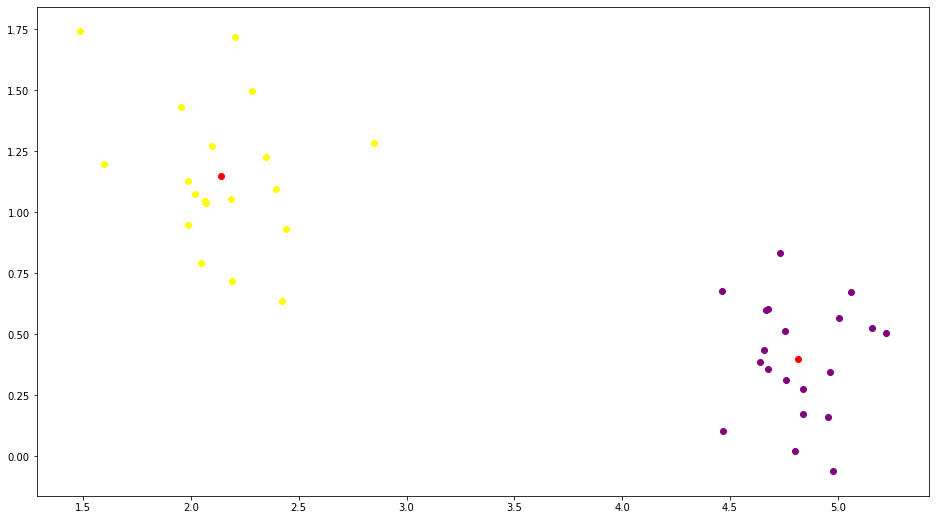

In [31]:
plt.figure(figsize=(16,9))
colors = ['yellow', 'purple']

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], color="red")

for classification in model.classifications:
    for point in model.classifications[classification]:
        plt.scatter(point[0], point[1], color=colors[classification])

plt.show()